## 极限学习机--Regression Example
训练部分，目的：求出$W_{out}$，随机初始化$W$和$b$
$$ H = sigmoid(Wx_{train}+b)\\ H^{+}=H\text{的广义逆}$$
$$ W_{out} = H^{+}{y_{train}} \text{(需要将 y 转成 one-hot)}$$
测试部分
$$ prediciton = sigmoid(Wx_{test}+b)W_{out}$$

In [1]:
from sklearn import datasets

Boston = datasets.load_boston()
X, y = Boston.data, Boston.target

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

需要标准化，不然会产生很大的极端值

In [3]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
standard.fit(X_train)
X_train_standard = standard.transform(X_train)
X_test_standard = standard.transform(X_test)

导入 ELM 框架

In [4]:
from frames.ELM import ELMRegression

In [5]:
# hidden_nodes 隐藏层神经元个数
elm = ELMRegression(hidden_nodes=150)

In [6]:
elm.fit(X_train_standard, y_train)

In [7]:
elm.score(X_test_standard, y_test)

mse: 27.552742745750514, rmse: 5.249070655435161, mae: 3.178178204533068, mape: 13.954344501928166, r2: 0.7366715853242545, r2_adjusted: 0.6977707967926103, rmsle: 0.3460882896011517


(27.552742745750514,
 5.249070655435161,
 3.178178204533068,
 13.954344501928166,
 0.7366715853242545,
 0.6977707967926103,
 0.3460882896011517)

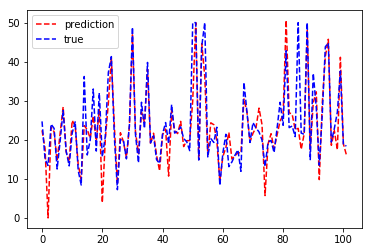

Save the picture successfully!


In [8]:
import os

save_path = 'Example_save_resultes/Regression/save_pngs'
if not os.path.exists(save_path):
    os.makedirs(save_path)
save_file = os.path.join(save_path, 'elm_regression.png')
elm.result_plot(X_test_standard, y_test, save_file, is_show=True)

### 使用网格搜索，调用 GridSearch 里面的 ELMRegressionGridSearch 函数

the neuron numbers of hidden layer:  5
mse: 162.8083303001897, rmse: 12.75963676207868, mae: 8.869965771002938, mape: 37.2068169659575, r2: -0.5559997024458223, rmsle: 0.5473088435637584
if you wanna get the value of r2_adjusted, you can define the number of features, which is the third parameter.
the neuron numbers of hidden layer:  10
mse: 54.90954097759764, rmse: 7.410097231318739, mae: 4.714309838116823, mape: 19.869518758641227, r2: 0.4752158610984841, rmsle: 0.30856986519771884
if you wanna get the value of r2_adjusted, you can define the number of features, which is the third parameter.
the neuron numbers of hidden layer:  15
mse: 40.12956882875523, rmse: 6.334790353970305, mae: 4.241206735941429, mape: 17.58174104863227, r2: 0.6164717306436898, rmsle: 0.23258726258764673
if you wanna get the value of r2_adjusted, you can define the number of features, which is the third parameter.
the neuron numbers of hidden layer:  20
mse: 39.56850304430331, rmse: 6.290349993784393, mae: 4.00

the neuron numbers of hidden layer:  145
mse: 23.721209845914508, rmse: 4.87044246921309, mae: 3.056301816208925, mape: 13.660362586183517, r2: 0.7732904981345732, rmsle: 0.18873243578993237
if you wanna get the value of r2_adjusted, you can define the number of features, which is the third parameter.
the neuron numbers of hidden layer:  150
mse: 34.05997271769999, rmse: 5.836092247189038, mae: 3.9801544539826663, mape: 17.170687402492415, r2: 0.674480370160812, rmsle: 0.28807669628704463
if you wanna get the value of r2_adjusted, you can define the number of features, which is the third parameter.
the neuron numbers of hidden layer:  155
mse: 26.426824758098466, rmse: 5.140702749439853, mae: 3.360811941278163, mape: 15.105326477331483, r2: 0.7474322635434509, rmsle: 0.26740238100072605
if you wanna get the value of r2_adjusted, you can define the number of features, which is the third parameter.
the neuron numbers of hidden layer:  160
mse: 19.537825029280395, rmse: 4.420161199467774,

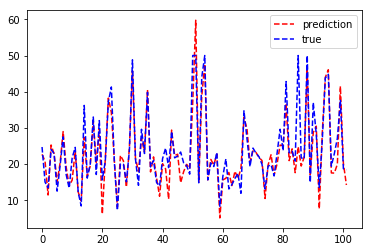

In [9]:
from frames.GridSearch import ElmRegressionGridSearch

# hidden_nodes 搜索上限
# gap 间隔多少神经元进行搜索，默认 10
# is_show 是否展示结果图
prediction = ElmRegressionGridSearch(X_train_standard, X_test_standard, y_train, y_test, hidden_nodes=200, gap=5, is_show=True) 

找到最好的 hidden number 是 160

In [13]:
elm2 = ELMRegression(hidden_nodes=160)
elm2.fit(X_train_standard, y_train)

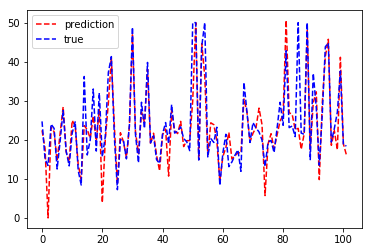

Save the picture successfully!


In [14]:
save_path = 'Example_save_resultes/Regression/save_pngs'
if not os.path.exists(save_path):
    os.makedirs(save_path)
save_file = os.path.join(save_path, 'elm_regression2.png')
elm.result_plot(X_test_standard, y_test, save_file, is_show=True)

### 保存值

In [15]:
result_path = './Example_save_resultes/Regression/'
if not os.path.exists(result_path):
    os.makedirs(result_path)
results_file = os.path.join(result_path, 'ElmRegression.csv')
elm.save_result(is_standard=True, Dimensionality_reduction_method='None', save_path=results_file)

Save results success!
